<a href="https://colab.research.google.com/github/erikazoo/Portfolio/blob/colab_portfolio/Portfolio_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full name: Erica Zhu

DATA1201 Final Exam

Date: 11/30/2023

Topic: How do sidewalks impact obesity rates in America?

In [1]:
# Loading in libraries and data tables
import numpy as np
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
obesity = Table.read_table("National_Obesity_By_State.csv")

In [3]:
spaces_made = Table.read_table("Pedestrian_Space_Added.csv")

In [4]:
vehicle_survey = Table.read_table("avsurvey2019data.csv")

In [5]:
sidewalk_eval = Table.read_table("sidewalks.csv")

In [6]:
walkability = Table.read_table("walkable_index.csv")


###**Section 1: Topic, Excerpts and Sources**

[Question Preface](https://docs.google.com/document/d/1zK8dwUrot2Ze-btatvvR47uEwsFcCOFl3x4Zm9TtAKc/edit?usp=sharing): *Background on the question created.*

#####**Sources:**

Datasets were primarily curated via the 'data.gov' website.

*   [2015 CDC BRFSS Survey - Lake County Illinois GIS](https://catalog.data.gov/dataset/national-obesity-by-state-d765a) *(Data Created 2022)*,
*   [Census 2019 - US E.P.A.](https://catalog.data.gov/dataset/walkability-index1) *(Data Created 2023)*,
*   [NYC OpenData](https://catalog.data.gov/dataset/pedestrian-space-added) *(Data Created 2021)*,
*   [City of San Fransisco](https://catalog.data.gov/dataset/dpw-street-sidewalk-evaluation-results-7-1-2013-to-present) *(Data Created 2020)*,
*   [Western Pennsylvania Regional Data Center](https://catalog.data.gov/dataset/autonomous-vehicle-survey-of-bicyclists-and-pedestrians-in-pittsburgh) *(Data Created 2023)*
*   (In Presentation) [Texas Tribune](https://www.texastribune.org/2023/08/24/texas-new-law-pedestrian-walking-roads-sidewalk/), 2023

#####**Scope:**
Various case studies across the U.S. on sidewalk status will be compared to the obesity rate of the state.

#####**Ethics:**
Though not negligible, this report will not be concerned by ethics BECAUSE the following parameters have been considered:

1.   All data was readily available via the government, with the justification that infrastructural data can be published to the public.
2.   All other data was noninvasive and did not reveal private information.
3.   The truncating of data was carefully considered so that representative populations may not be ignored.

In this section, the raw data will be displayed, cleaned and wrangled into their final visualizations-- the results of which will be explored in Section 2.



In [7]:
# Viewing the data:
obesity.show(3)

FID,NAME,Obesity,SHAPE_Length,SHAPE_Area
1,Texas,32.4,1.54083e+07,7.67233e+12
2,California,24.2,1.45187e+07,5.32781e+12
3,Kentucky,34.6,6.3467e+06,1.12883e+12


In [8]:
state_percentage = obesity.select("NAME", "Obesity").sort("Obesity") # addendum .show(#) to show number of rows you want
state_percentage

NAME,Obesity
Colorado,20.2
District of Columbia,22.1
Hawaii,22.7
Montana,23.6
California,24.2
Massachusetts,24.3
Utah,24.5
New York,25
Vermont,25.1
Connecticut,25.3


In [9]:
spaces_made.show(3)

Name,Boro,CB,On street:,Cross-street 1:,Cross-street 2:,Area (sf),Area (acres),Project Type
Fulton St/East New York Ave,BK,5,Fulton St/Herkimer St,East New York Ave,Fulton St,1000,0.023,Planted median/ pedestrian refuge
East New York Ave/Atlantic Ave,BK,5,East New York Ave,Atlantic Ave,Junius Ave,1950,0.045,Curb extension
Neptune Ave/West 19th St,BK,13,Neptune Ave,West 19th St,West 20th St,400,0.009,Planted median/ pedestrian refuge


In [10]:
# Cleaned the data so that ONLY extension projects are listed
C_spaces_made = Table.read_table("CLEAN_Pedestrian_Space_Added.csv")
extensions = C_spaces_made.select("Name", "Area (sf)", " Extension?").where(" Extension?", " Y")
extensions

Name,Area (sf),Extension?
Fulton St/East New York Ave,1000,Y
Neptune Ave/West 19th St,400,Y
"Hell's Kitchen, 36th & 9th Canoe",10168,Y
Church Ave Congested Corridors,2270,Y
Church Ave Congested Corridors,270,Y
Church Ave Congested Corridors,320,Y
White Plans Rd Congested Corridors,21315,Y
White Plans Rd Congested Corridors,3660,Y
White Plans Rd Congested Corridors,870,Y
White Plans Rd Congested Corridors,360,Y


In [11]:
C_spaces_made.num_rows

60

In [12]:
vehicle_survey.show(3)

RespondentID,StartDate,EndDate,FamiliarityNews,FamiliarityTech,SharedCyclist,SharedPedestrian,SafeAv,SafeHuman,AvImpact,ProvingGround,Speed25Mph,TwoEmployeesAv,SchoolZoneManual,ShareTripData,SharePerformanceData,ReportSafetyIncident,ArizonaCrash,ZipCode,BikePghMember,AutoOwner,SmartphoneOwner,Age
10505419886,2/2/2019,2/2/2019,To a moderate extent,Somewhat familiar,Yes,Yes,4,2,Significantly Better,Approve,No,Not sure,No,Not sure,Yes,Yes,No change,15212,No,Yes,Yes,25-34
10505138734,2/2/2019,2/2/2019,To a moderate extent,Somewhat familiar,Yes,No,5,4,Significantly Better,Neutral,No,No,No,No,Yes,Not sure,No change,15232,Not sure,Yes,Yes,25-34
10504803283,2/1/2019,2/1/2019,To a moderate extent,Somewhat familiar,Yes,Yes,1,4,Significantly Worse,Disapprove,Not sure,Yes,No,No,No,Not sure,Significantly more negative opinion,nan,No,No,No,nan


In [13]:
car_owner = vehicle_survey.select("AutoOwner").where("AutoOwner", "Yes").num_rows
non_owner = vehicle_survey.select("AutoOwner").where("AutoOwner", "No").num_rows
print(car_owner, non_owner)
percent_nondrivers = float(non_owner/(car_owner+non_owner))

748 44


In [14]:
sidewalk_eval.show(5) # Gov survey redirected me when I tried to look at analysis...

Corridor #,Corridor Description,Corridor Num and Description,FY,Clean Corridor,Type,Detailed Type,Midpoint times,Side of street,SupDistrict,DPW Zone,Representative Street Segment,CNN (Route ID),Evaluation date,Evaluator name,Inspector,"11 Score (10, 20, or 30 score)","21 Litter (10, 20, or 30 score)","22 Grime, Leaks, Spills (% of sidewalk w/out)","24 Illegal Dumping (Y/N, where Y=none)","251 Feces, Needles, Condoms (Y/N, where Y=none)","252 Broken Glass (Y/N, where Y=none)",26 Odors (DPW),27 Odors (nonDPW),31 Public (DPW),32 Public (nonDPW),33 Private (Please indicate nearest address on attached work s,"34 Sidewalk (# on sidewalk, preiously 23)",Total # Trash Receptacles,41 Fullness,42 Cleanliness of trash receptacles,43 Cleanliness around trash receptacles,44 Painting,45 Structural integrity & function,46 Doors,Total # Trees,51 Cleanliness,52 Tree Appearance,53 Weediness,54 Clearance,11 pass,21 Pass,22 Pass,31 Pass,32 Pass,33 Pass,34 Pass,41 Pass,42 Pass,43 Pass,44 Pass,45 Pass,46 Pass,51 Pass,52 Pass,53 Pass,54 Pass,Longitude,Latitude,Location,Priority
nan,Guttenberg St -- Mission to Hanover,nan,2017-18,nan,Residential,Residential,Wed 12PM to 5PM,L,11,E,Guttenberg St : Pretor Way - Hanover St,6595000,06/06/2018 12:00:00 AM,Jordan,JBR,1,1.0625,0.9725,1,1,1,1,1,0,1.375,0,0,0,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,1,1,1,1,0,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-122.443,37.7099,nan,Regular
60,Mission EE: Rolph to Foote,#60 Mission EE: Rolph to Foote,2017-18,Clean Corridor,Commercial,Commercial,Fri 12PM to 5PM,R,11,E,Mission St : Rolph St - Niagara Ave,9179000,05/18/2018 12:00:00 AM,Jordan,JBR,1,1.20833,0.961389,1,1,1,1,1,0,6.40278,0,0.472222,1,1,1,1,1,1,1,23,0.895833,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,-122.442,37.7158,nan,Regular
53,Potrero B: 20th - Cesar Chavez,#53 Potrero B: 20th - Cesar Chavez,2017-18,Clean Corridor,Commercial,Residential/Commercial,Thu 12PM to 5PM,R,10,E,Potrero Ave : 23rd St - 24th St,10671000,06/28/2018 12:00:00 AM,Jordan,JBR,1.4,1.4,0.947167,1,0,1,1,1,0.25,1.36667,0,0.683333,3,1,1,0.666667,1,1,1,23,0.852381,0.944444,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,1,-122.406,37.7543,nan,Regular
74,Van Ness 5: Mission - Golden Gate,#74 Van Ness 5: Mission - Golden Gate,2017-18,nan,Commercial,Commercial,Fri 12PM to 5PM,L,6,B,South Van Ness Ave : Market St - Mission St,12015101,06/22/2018 12:00:00 AM,Jordan,JBR,1.1,1.08333,0.955167,1,1,1,1,1,0,2.68333,0,0.8,10,1,1,1,1,1,1,43,0.8375,0.9375,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,-122.419,37.7751,nan,Regular
nan,28th Ave -- California to Cabrillo,nan,2017-18,nan,Residential,Residential,"Fri 1st, 3rd 9AM to 11AM",R,1,C,28th Ave : Clement St - Geary Blvd,1578000,06/01/2018 12:00:00 AM,Jordan,JBR,1.35,1.3,0.951,1,1,1,1,1,0,0.5,0,0.1,0,nan,nan,nan,nan,nan,nan,14,0.9375,1,1,1,1,1,1,1,0,1,0,nan,nan,nan,nan,nan,nan,1,1,1,1,-122.488,37.7819,nan,Regular


In [15]:
street_cleanliness = sidewalk_eval.select(6, 17, 20, 21, 28, 30, 31, 36)
street_cleanliness

Detailed Type,"21 Litter (10, 20, or 30 score)","251 Feces, Needles, Condoms (Y/N, where Y=none)","252 Broken Glass (Y/N, where Y=none)",Total # Trash Receptacles,42 Cleanliness of trash receptacles,43 Cleanliness around trash receptacles,51 Cleanliness
Residential,1.0625,1,1,0,nan,nan,nan
Commercial,1.20833,1,1,1,1,1,0.895833
Residential/Commercial,1.4,0,1,3,1,0.666667,0.852381
Commercial,1.08333,1,1,10,1,1,0.8375
Residential,1.3,1,1,0,nan,nan,0.9375
Commercial,1,1,1,12,1,1,0.838095
Residential,1.15,1,1,0,nan,nan,1
Residential,1,1,1,1,1,1,0.979592
Residential,1,1,1,0,nan,nan,0.909091
Residential,1.05,1,1,0,nan,nan,0.870455


In [70]:
walkable_rating = walkability.select("CBSA_Name", "NatWalkInd")
group_walkable_rating = walkable_rating.group('CBSA_Name', np.mean).sort(1)
group_walkable_rating

CBSA_Name,NatWalkInd mean
"Alexander City, AL",4.70922
"Scottsboro, AL",4.80303
"Jacksonville, TX",4.95238
"Fort Payne, AL",5.06604
"Forrest City, AR",5.0679
"Eufaula, AL-GA",5.18841
"Athens, TX",5.22531
"Sonora, CA",5.23333
"Jasper, AL",5.25575
"Bonham, TX",5.28333


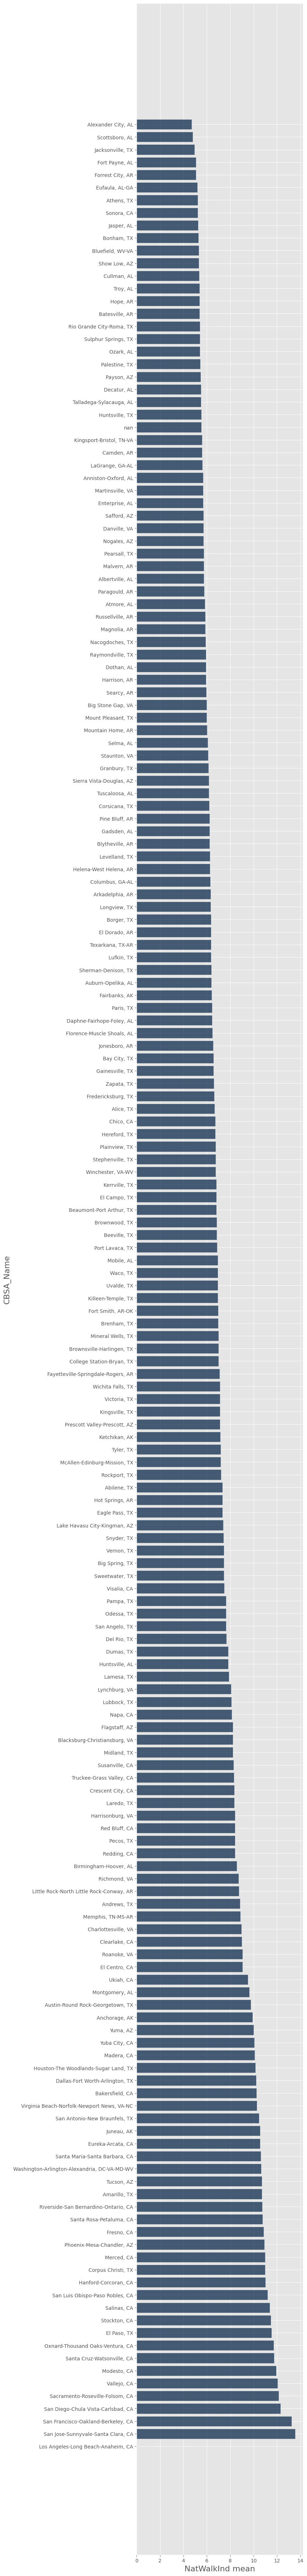

In [72]:
group_walkable_rating.barh('CBSA_Name')

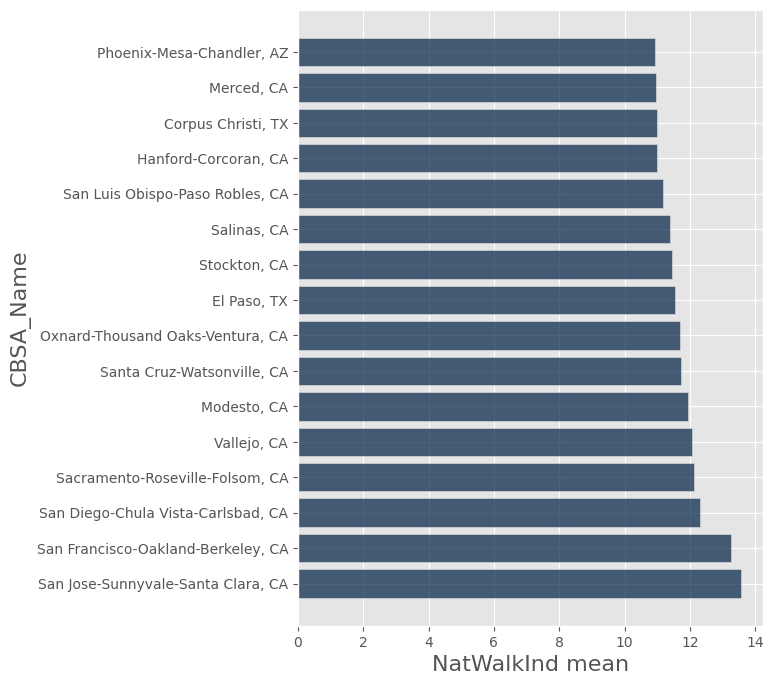

In [247]:
higher_walk = group_walkable_rating.where('NatWalkInd mean', are.above(10.9))
higher_walk.barh('CBSA_Name')

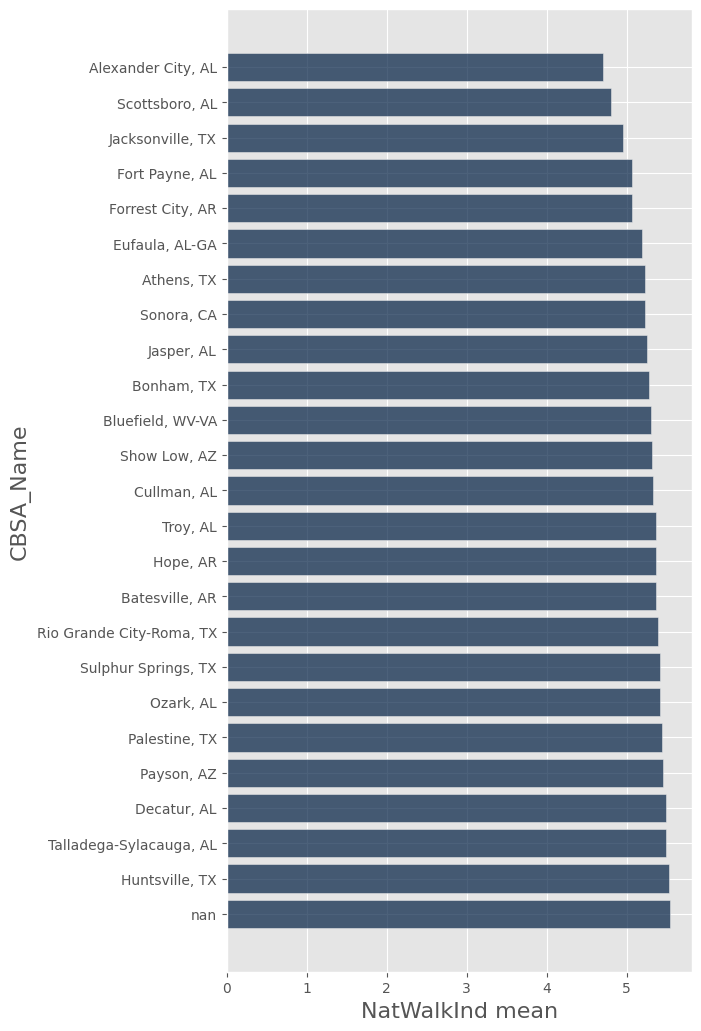

In [248]:
lower_walk = group_walkable_rating.where('NatWalkInd mean', are.below(5.55))
lower_walk.barh('CBSA_Name')

In [40]:
total_pop = walkability.select('CBSA_Name', 'TotPop')
total_populations = total_pop.group('CBSA_Name', np.sum).sort(1)
total_populations

CBSA_Name,TotPop sum
"Sonora, CA",6693
"Crescent City, CA",6712
"Vernon, TX",12906
"Lamesa, TX",12964
"Ketchikan, AK",13804
"Zapata, TX",14369
"Sweetwater, TX",14966
"Pecos, TX",15227
"Snyder, TX",17239
"Andrews, TX",17818


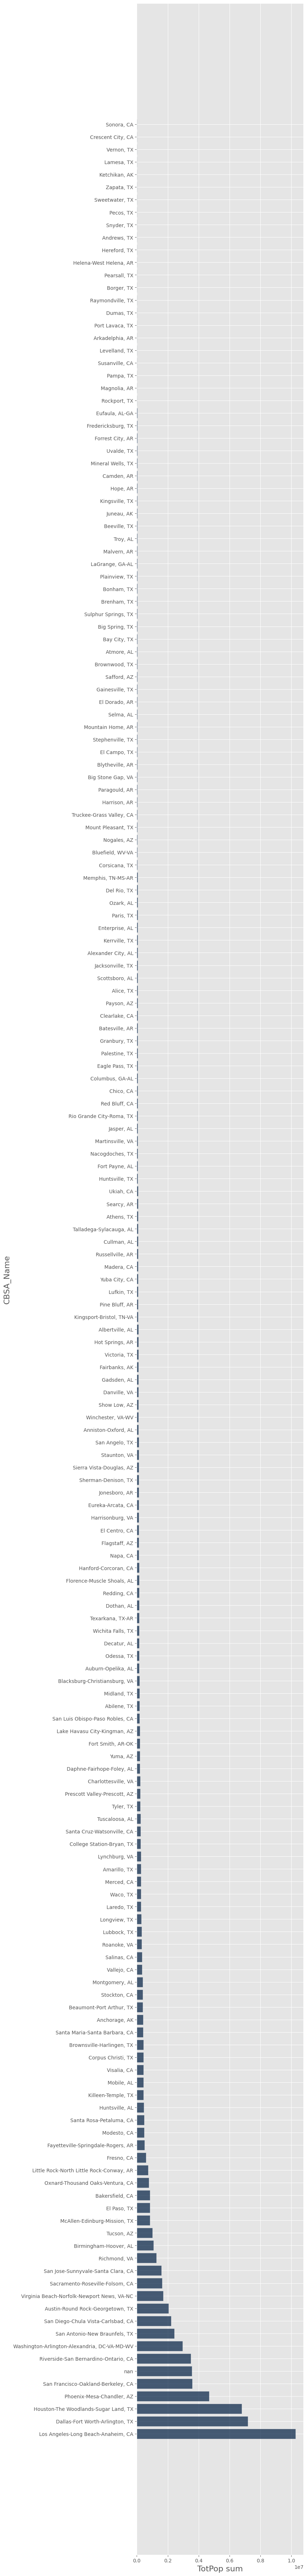

In [44]:
total_populations.barh('CBSA_Name') # Clearly needs to be broken down into smaller scales...

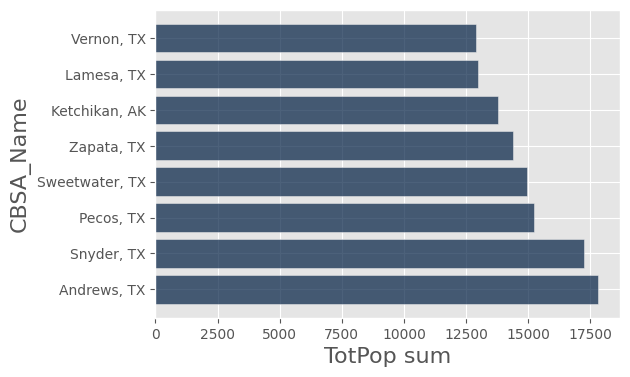

In [253]:
lower_pop = total_populations.where('TotPop sum', are.between(12000, 18000))
lower_pop.barh('CBSA_Name')

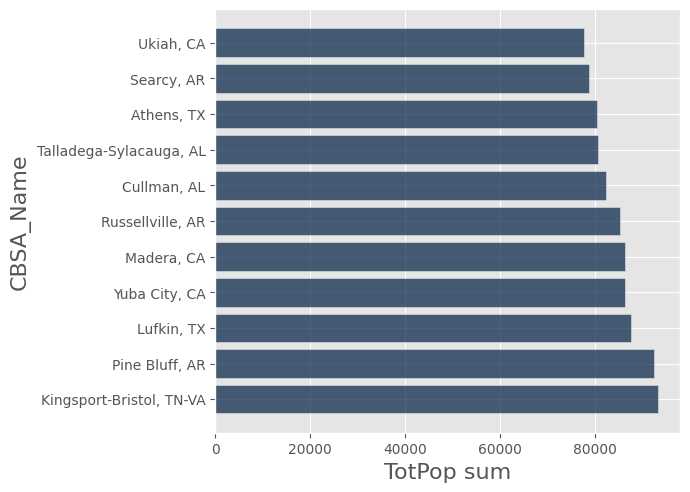

In [254]:
middle_sample = total_populations.where('TotPop sum', are.between(75000, 95000))
middle_sample.barh('CBSA_Name')

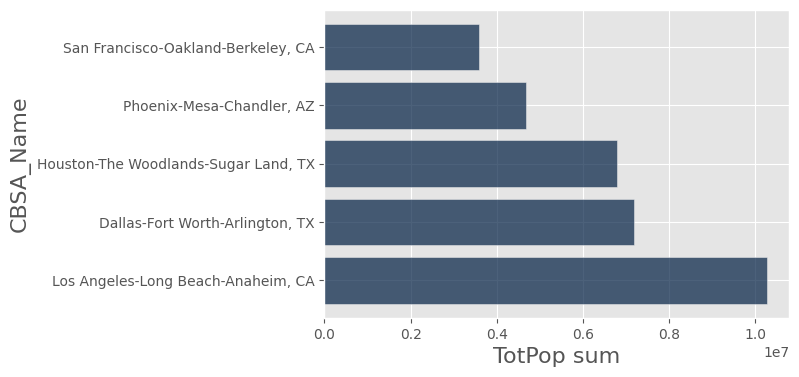

In [256]:
higher_pop = total_populations.where('TotPop sum', are.above(3580000))
higher_pop.barh('CBSA_Name')

In [25]:
state_percentage

NAME,Obesity
Colorado,20.2
District of Columbia,22.1
Hawaii,22.7
Montana,23.6
California,24.2
Massachusetts,24.3
Utah,24.5
New York,25
Vermont,25.1
Connecticut,25.3


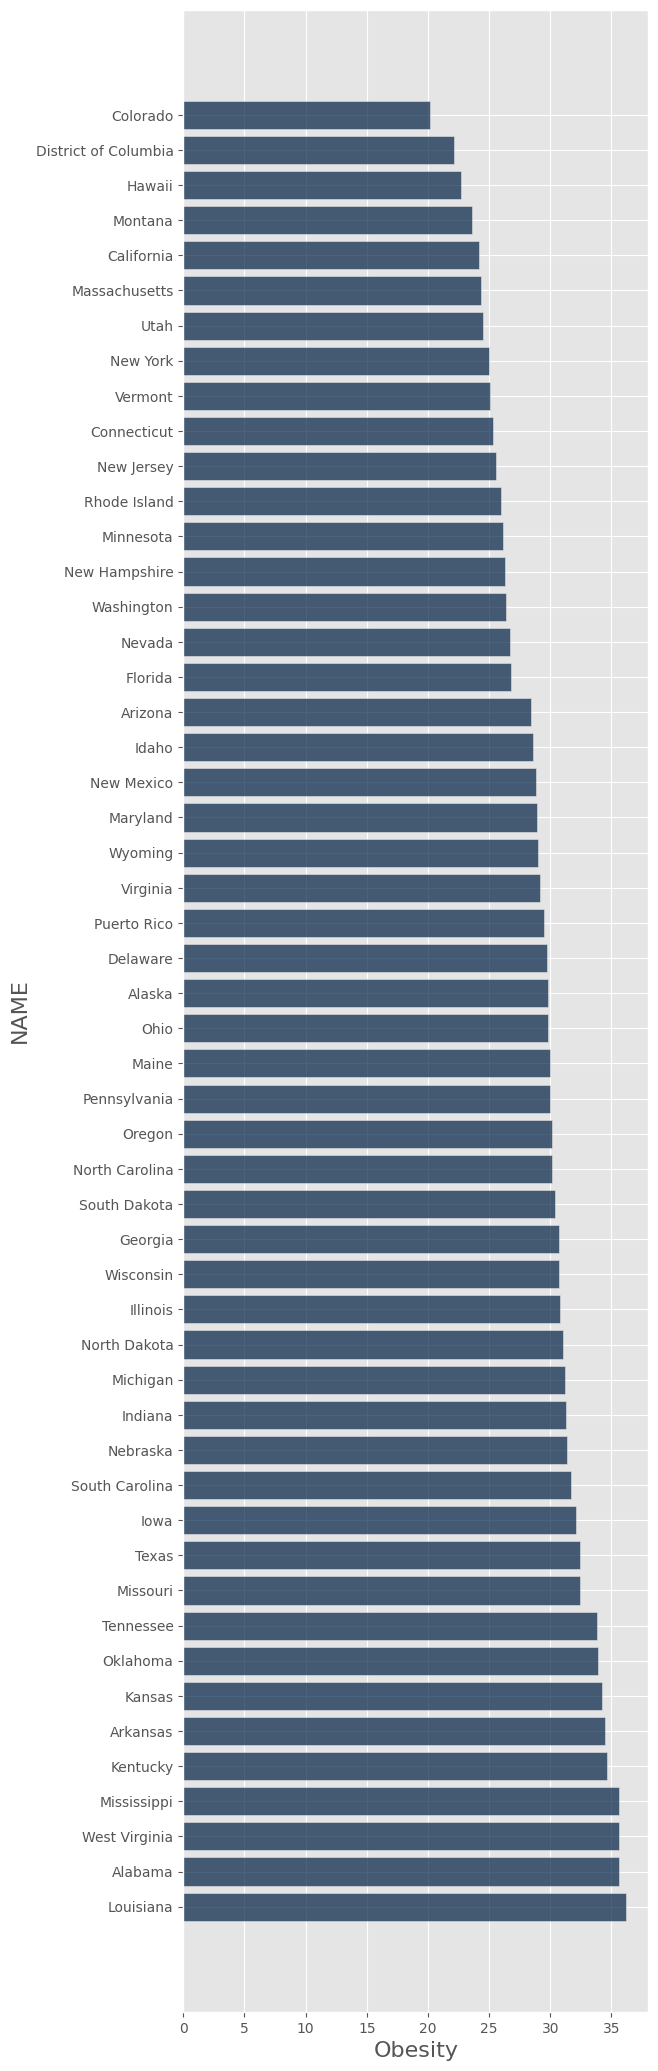

In [271]:
state_percentage.barh('NAME')

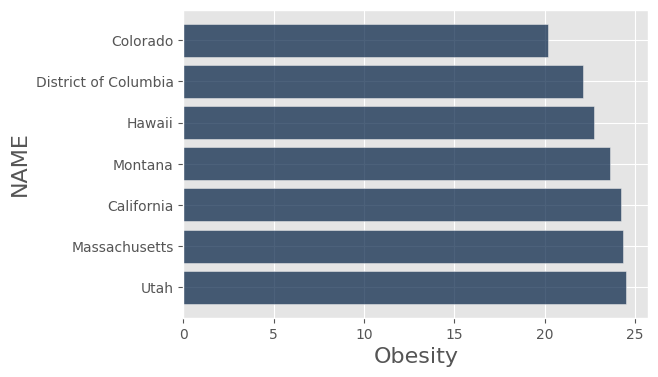

In [258]:
lower_ptgs = state_percentage.where('Obesity', are.below(25))
lower_ptgs.barh('NAME')

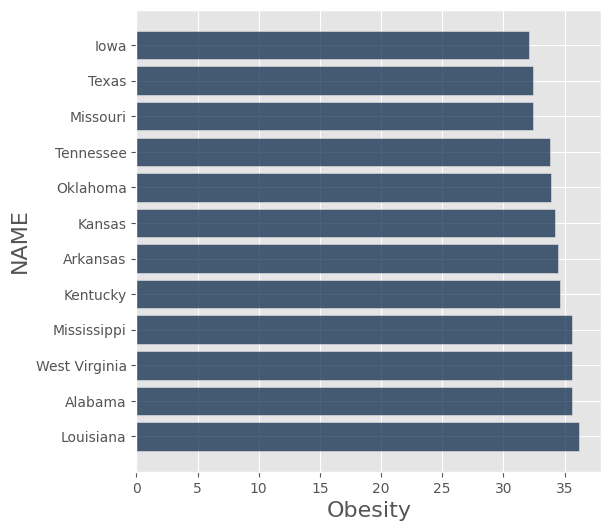

In [260]:
higher_ptgs = state_percentage.where('Obesity', are.above(32))
higher_ptgs.barh('NAME')

In [242]:
extensions

Name,Area (sf),Extension?
Fulton St/East New York Ave,1000,Y
Neptune Ave/West 19th St,400,Y
"Hell's Kitchen, 36th & 9th Canoe",10168,Y
Church Ave Congested Corridors,2270,Y
Church Ave Congested Corridors,270,Y
Church Ave Congested Corridors,320,Y
White Plans Rd Congested Corridors,21315,Y
White Plans Rd Congested Corridors,3660,Y
White Plans Rd Congested Corridors,870,Y
White Plans Rd Congested Corridors,360,Y


In [27]:
extensions.sort('Area (sf)').show()

Name,Area (sf),Extension?
Church Ave Congested Corridors,270,Y
Church Ave Congested Corridors,320,Y
White Plans Rd Congested Corridors,360,Y
Neptune Ave/West 19th St,400,Y
White Plans Rd Congested Corridors,870,Y
Fulton St/East New York Ave,1000,Y
"Forest Avenue, South Ave to Willowbrook Rd",1050,Y
33rd Street Plaza,1200,Y
Downtown Flushing Mobility & Safety Project,1260,Y
Church Ave Congested Corridors,2270,Y


In [29]:
street_cleanliness

Detailed Type,"21 Litter (10, 20, or 30 score)","251 Feces, Needles, Condoms (Y/N, where Y=none)","252 Broken Glass (Y/N, where Y=none)",Total # Trash Receptacles,42 Cleanliness of trash receptacles,43 Cleanliness around trash receptacles,51 Cleanliness
Residential,1.0625,1,1,0,nan,nan,nan
Commercial,1.20833,1,1,1,1,1,0.895833
Residential/Commercial,1.4,0,1,3,1,0.666667,0.852381
Commercial,1.08333,1,1,10,1,1,0.8375
Residential,1.3,1,1,0,nan,nan,0.9375
Commercial,1,1,1,12,1,1,0.838095
Residential,1.15,1,1,0,nan,nan,1
Residential,1,1,1,1,1,1,0.979592
Residential,1,1,1,0,nan,nan,0.909091
Residential,1.05,1,1,0,nan,nan,0.870455


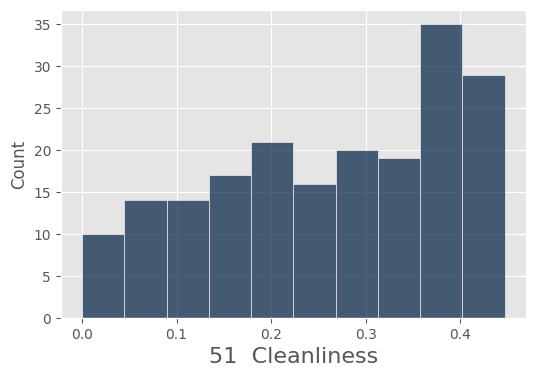

In [263]:
percent = street_cleanliness.group(7)
percent = percent.where(0, are.below(0.45))
percent.hist(0, density = False)

In [225]:
street_cleanliness.group(1).where('count', are.above(30))

"21 Litter (10, 20, or 30 score)",count
1,610
1.1,44
1.2,45
1.5,31
2,60


In [267]:
l = street_cleanliness.where('Total # Trash Receptacles', 0).num_rows

In [268]:
n = street_cleanliness.num_rows

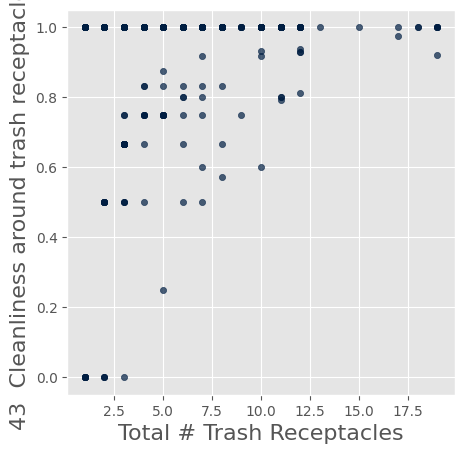

In [265]:
street_cleanliness.scatter(4,6)

### **Section 2: Data Exploration, Results, Visualization**

The goal of this section is to look at all visuals in their final modelled state, from reformatted data to more explicit(reader friendly) labels. Stats are reiterated/newly calculated in preparation for conclusions.

Observations/Implicit questions about all this data can be found at the **end of this section.**

In [243]:
percent_nondrivers # 94.5% of people in a sample size at the very least own a car.

0.05555555555555555

Text(0, 0.5, 'Location')

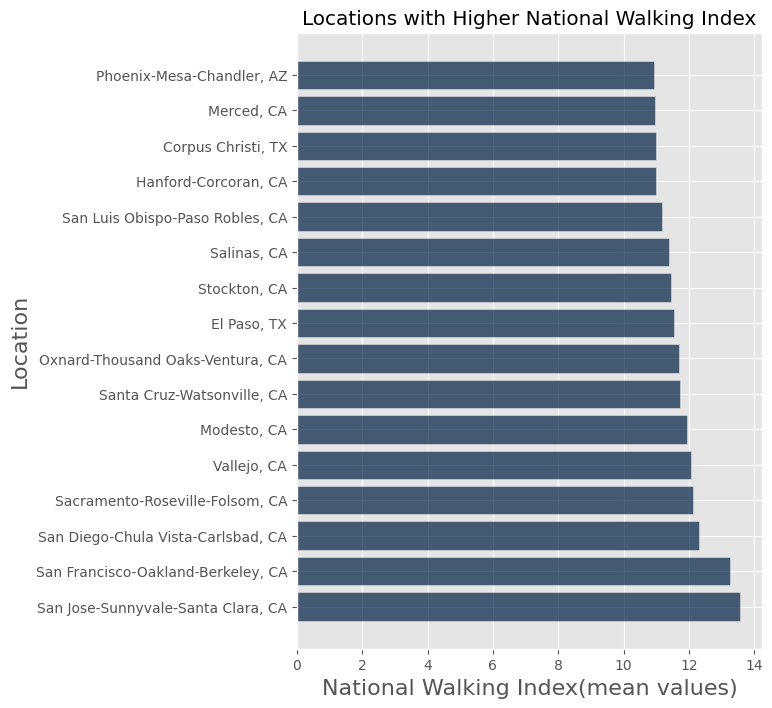

In [246]:
higher_walk.barh('CBSA_Name')
plt.title('Locations with Higher National Walking Index')
plt.xlabel('National Walking Index(mean values)')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

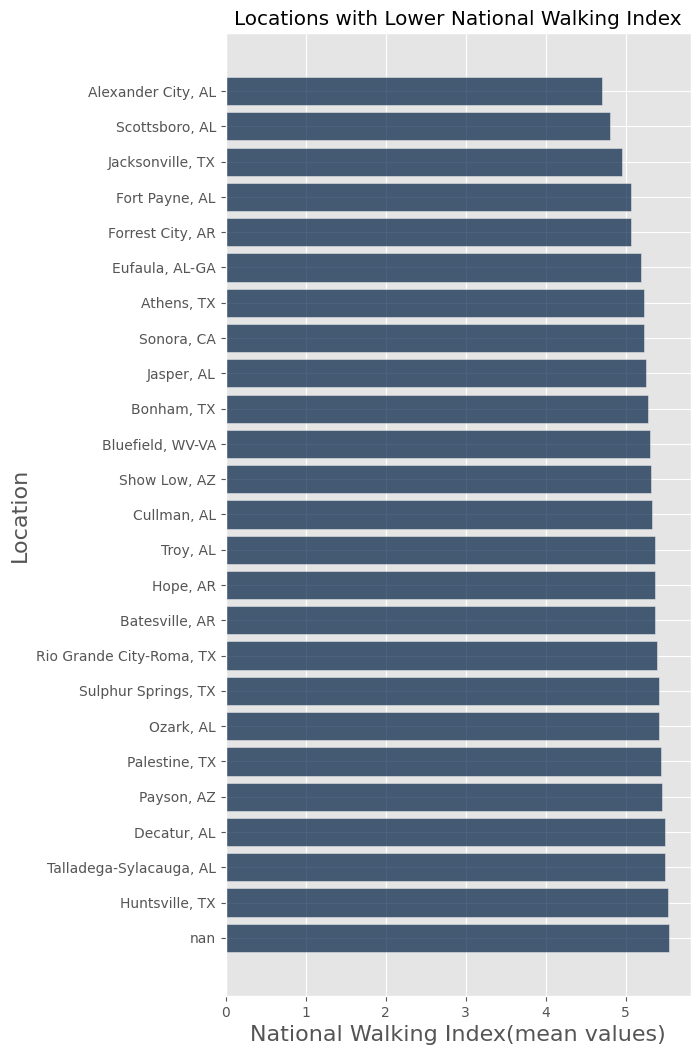

In [249]:
lower_walk.barh('CBSA_Name')
plt.title('Locations with Lower National Walking Index')
plt.xlabel('National Walking Index(mean values)')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

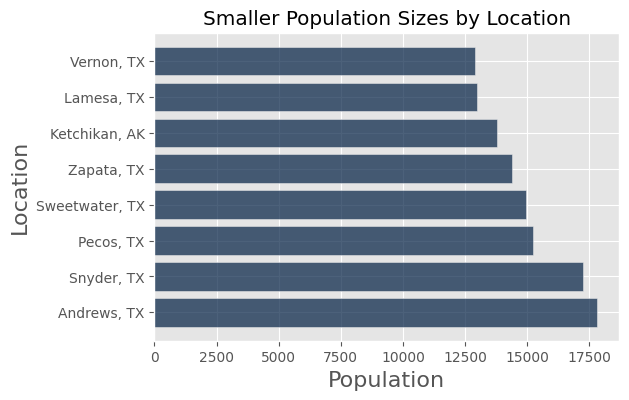

In [252]:
lower_pop.barh('CBSA_Name')
plt.title('Smaller Population Sizes by Location')
plt.xlabel('Population')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

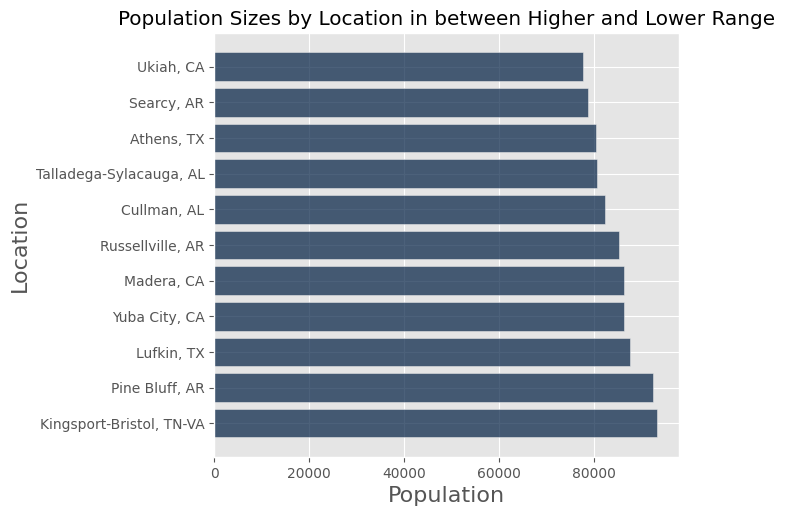

In [255]:
middle_sample.barh('CBSA_Name')
plt.title('Population Sizes by Location in between Higher and Lower Range')
plt.xlabel('Population')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

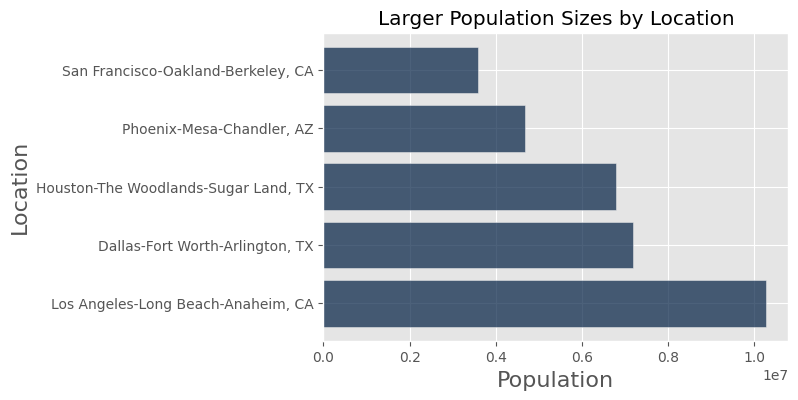

In [257]:
higher_pop.barh('CBSA_Name')
plt.title('Larger Population Sizes by Location')
plt.xlabel('Population')
plt.ylabel('Location')

Text(0, 0.5, 'State')

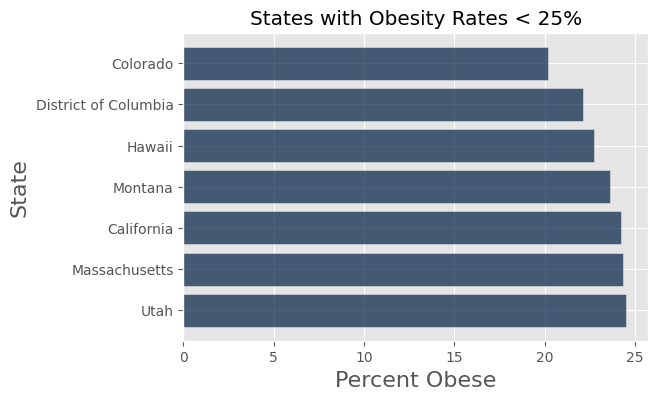

In [259]:
lower_ptgs.barh('NAME')
plt.title('States with Obesity Rates < 25%')
plt.xlabel('Percent Obese')
plt.ylabel('State')

Text(0, 0.5, 'State')

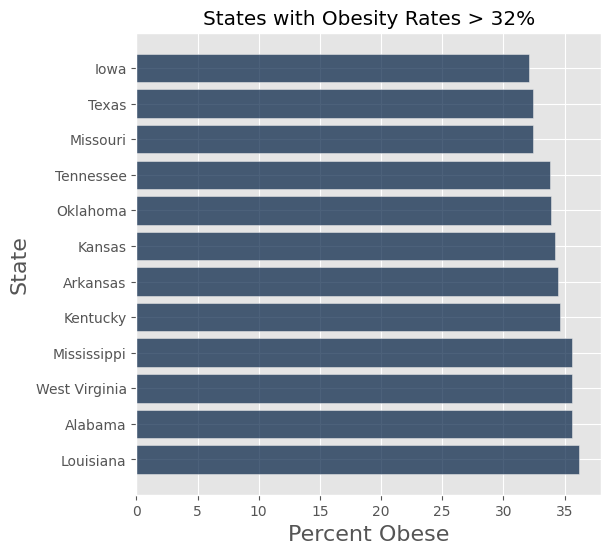

In [261]:
higher_ptgs.barh('NAME')
plt.title('States with Obesity Rates > 32%') # 30% would be too many data points to acurately compare data
plt.xlabel('Percent Obese')
plt.ylabel('State')

In [262]:
extensions.sort('Area (sf)').show()

Name,Area (sf),Extension?
Church Ave Congested Corridors,270,Y
Church Ave Congested Corridors,320,Y
White Plans Rd Congested Corridors,360,Y
Neptune Ave/West 19th St,400,Y
White Plans Rd Congested Corridors,870,Y
Fulton St/East New York Ave,1000,Y
"Forest Avenue, South Ave to Willowbrook Rd",1050,Y
33rd Street Plaza,1200,Y
Downtown Flushing Mobility & Safety Project,1260,Y
Church Ave Congested Corridors,2270,Y


Text(0.5, 0, 'Percent of Streets deemed < 45% Clean')

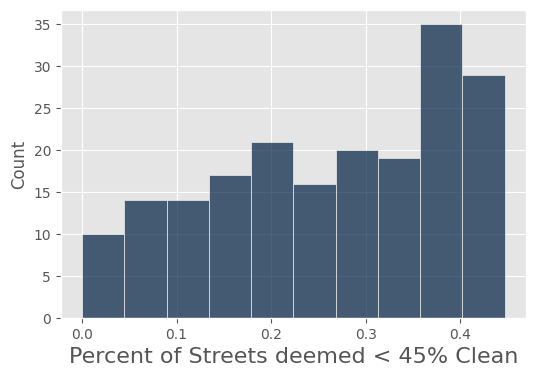

In [276]:
percent = street_cleanliness.group(7)
percent = percent.where(0, are.below(0.45))
percent.hist(0, density = False)
plt.xlabel('Percent of Streets deemed < 45% Clean')

Text(0, 0.5, 'Cleanliness')

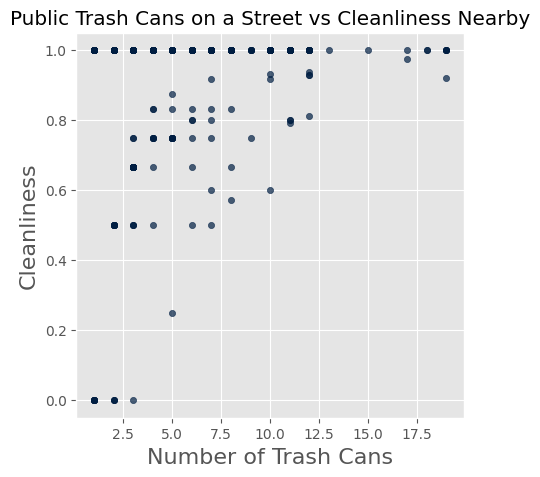

In [266]:
street_cleanliness.scatter(4,6)
plt.title('Public Trash Cans on a Street vs Cleanliness Nearby')
plt.xlabel('Number of Trash Cans')
plt.ylabel('Cleanliness')

In [270]:
ptg_streets_no_cans = l/(l+n)
ptg_streets_no_cans # 24.7% Streets in San Francisco sample had no trash cans at all

0.24691358024691357

Observations:


*   The percentage of California's population being obese is relatively lower, while walkability indexes for California seem to be relatively higher to other data points. The correlation between walkability and obesity rates is further solidified by the case study of Pheonix-Mesa-Chandler in Arizona(a city area that has a high population and a high walkability index, and a obesity percentage that ranks it 32 in the nation--below the national average).
*   Sidewalks are rarely expanded and are shown to be quite hostile(unclean and littered, lack of trash cans, etc). This does not include other factors that makes streets unfriendly towards pedestrians(crime, highways, suburban/rural inaccessibility).
*   The American Midwest and South are both disproportionately affected by a low walkability score and a higher obesity rate.

Hypotheses:
*   Though outside the purview of this report, it can be purported that the extent to which other factors such as processed food and workplace habit is outweighed by the impact of hostile infrastructure towards pedestrians. By extension, how this hostile infrastructure has impacted American culture would have the greatest influence over rising obesity rates.
*   Sidewalks may be created in greater proportion to population -- though, it does not *necessarily* impact walkability, as other factors such as safety vary(meaning a sample on route use would be needed).
*   Impoverished neighborhoods have a greater margin of error in most hypotheses, because while it is true that infrastructure may be underfunded, there is a multiplicity of other factors that may or may not weigh on similar levels to infrastructural problems.
*   Disposal systems encourage less littering.



### **Section 3: Conclcusions**


####1. Infrastructure is built around people.

It should be no coincidence that more densely populated areas had a higher walkability index and lower obesity rates across the board. But, with 94.5% of people owning a car, it is clear that more often than not a local government would prioritize the construction of roads **over** the construction of the streets beside them.

Text(0, 0.5, 'Location')

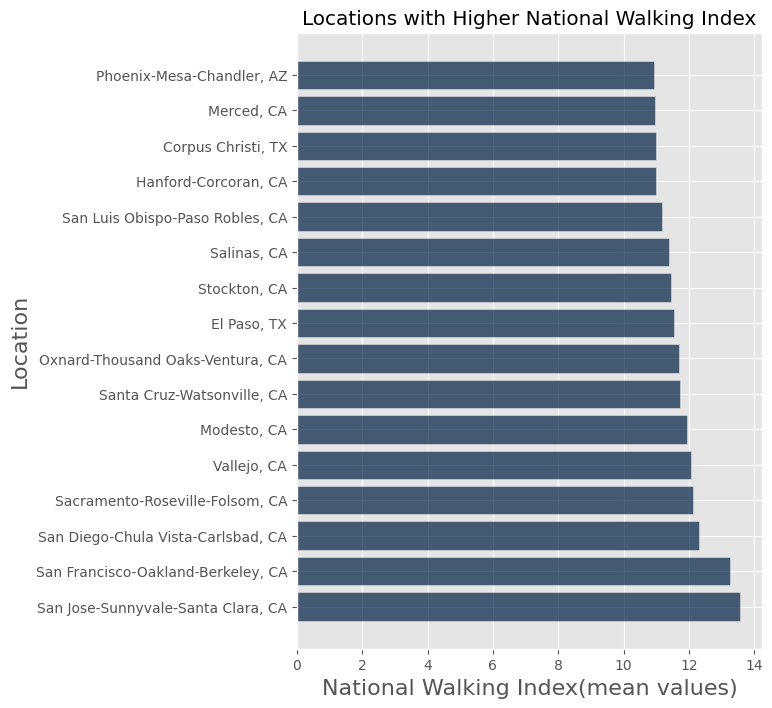

In [280]:
higher_walk.barh('CBSA_Name')
plt.title('Locations with Higher National Walking Index')
plt.xlabel('National Walking Index(mean values)')
plt.ylabel('Location')

Text(0, 0.5, 'Location')

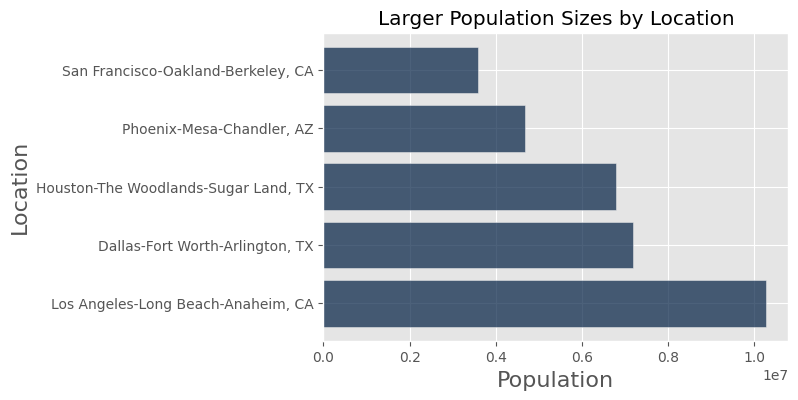

In [275]:
higher_pop.barh('CBSA_Name')
plt.title('Larger Population Sizes by Location')
plt.xlabel('Population')
plt.ylabel('Location')

####2. The outlook for better pedestrian infrastructure is not a positive one.

* In New York, 1/8 of construction projects were that of sidewalk extensions, and even less were of sidewalk creations.
* Streets are left unclean, in general. Trash cans have been proven to alleviate littering, but are not always implemented.

In [277]:
extensions.sort('Area (sf)').show()

Name,Area (sf),Extension?
Church Ave Congested Corridors,270,Y
Church Ave Congested Corridors,320,Y
White Plans Rd Congested Corridors,360,Y
Neptune Ave/West 19th St,400,Y
White Plans Rd Congested Corridors,870,Y
Fulton St/East New York Ave,1000,Y
"Forest Avenue, South Ave to Willowbrook Rd",1050,Y
33rd Street Plaza,1200,Y
Downtown Flushing Mobility & Safety Project,1260,Y
Church Ave Congested Corridors,2270,Y


Text(0.5, 0, 'Percent of Streets deemed < 45% Clean')

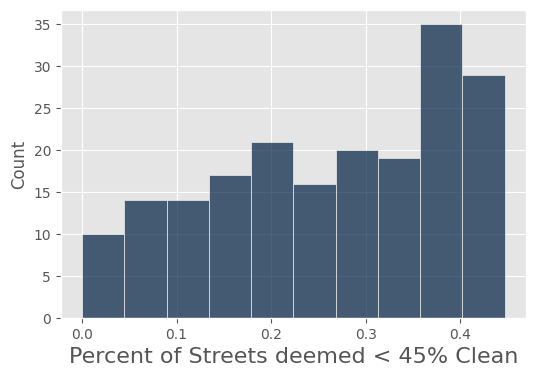

In [278]:
percent = street_cleanliness.group(7)
percent = percent.where(0, are.below(0.45))
percent.hist(0, density = False)
plt.xlabel('Percent of Streets deemed < 45% Clean')

Text(0, 0.5, 'Cleanliness')

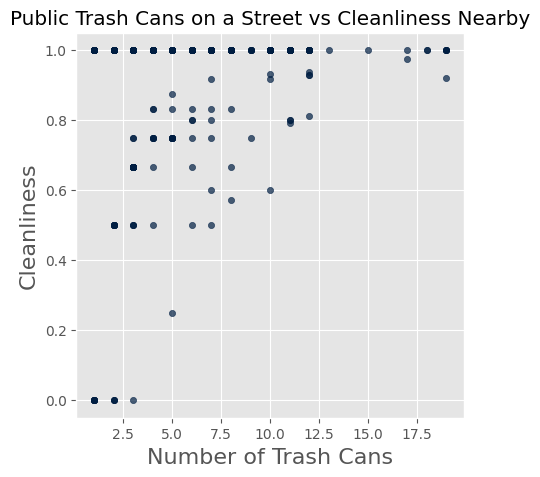

In [279]:
street_cleanliness.scatter(4,6)
plt.title('Public Trash Cans on a Street vs Cleanliness Nearby')
plt.xlabel('Number of Trash Cans')
plt.ylabel('Cleanliness')

####3. The Midwest-Southern regions of the US are disproportionally affected by bad infrastructure.

This problem is exacerbated by a high population count and possible lower developments in cities, among other factors. The state of their infrastructure appears to be highly correlated with obesity rates.

Text(0, 0.5, 'State')

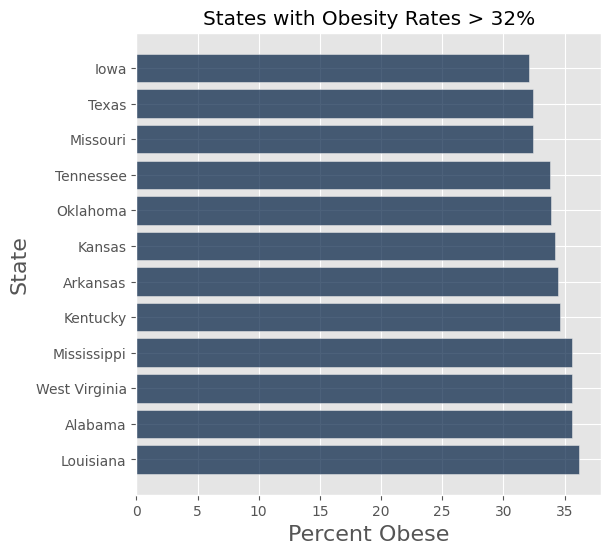

In [281]:
higher_ptgs.barh('NAME')
plt.title('States with Obesity Rates > 32%') # 30% would be too many data points to acurately compare data
plt.xlabel('Percent Obese')
plt.ylabel('State')

Text(0, 0.5, 'Location')

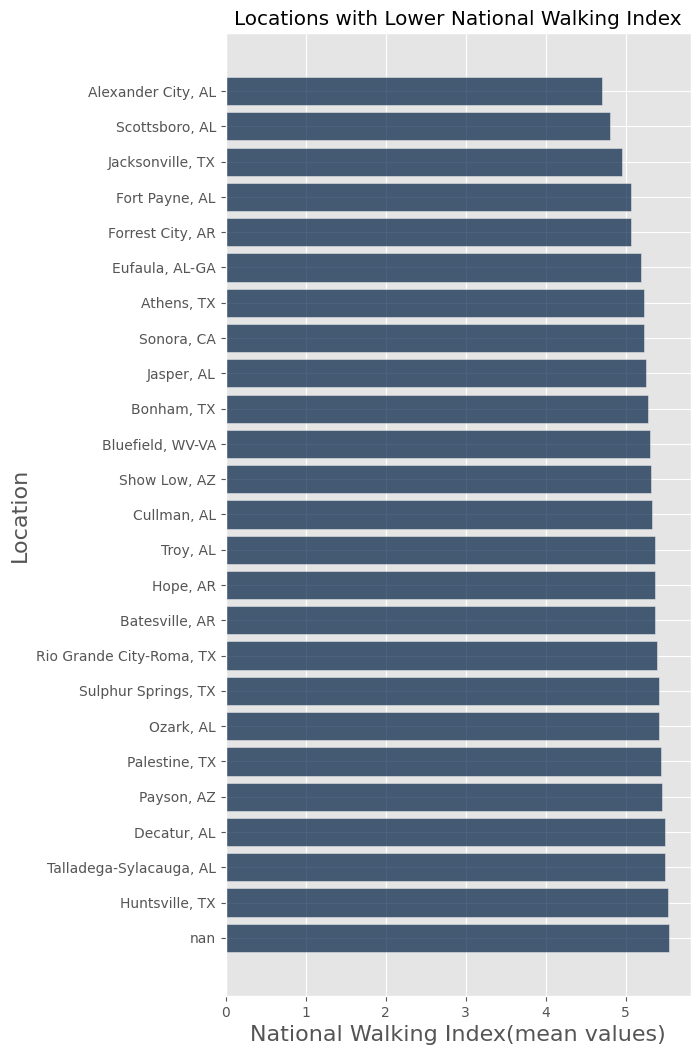

In [282]:
lower_walk.barh('CBSA_Name')
plt.title('Locations with Lower National Walking Index')
plt.xlabel('National Walking Index(mean values)')
plt.ylabel('Location')